In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
ball_milling_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Ball Milling Powder Samples/BallMilling ML Data.csv')
ball_milling_data

,Tag,Ball-Powder Ratio,Jar,20mm Run Time (Hours),10mm Run Time (Hours),6mm Run Time (Hours),Total Run Time (Hours),Circ.,Feret,AR,...,Skew,Slice,Kurt,Median,%Area,StdDev,Min,Max,X,Y
0,A5,15:1,NaN,32.0,8.0,0.0,40.0,0.720,123.130,1.102,...,NaN,1,NaN,255,100,0,255,255,666.151,84.302
1,A5,15:1,NaN,32.0,8.0,0.0,40.0,0.683,61.400,1.098,...,NaN,1,NaN,255,100,0,255,255,1148.411,62.168
2,A5,15:1,NaN,32.0,8.0,0.0,40.0,0.705,76.531,1.385,...,NaN,1,NaN,255,100,0,255,255,436.136,208.367
3,A5,15:1,NaN,32.0,8.0,0.0,40.0,0.420,16.401,3.234,...,NaN,1,NaN,255,100,0,255,255,959.990,555.173
4,A5,15:1,NaN,32.0,8.0,0.0,40.0,0.430,16.279,3.864,...,NaN,1,NaN,255,100,0,255,255,966.700,561.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94477,D1-10,7:5:1,1.0,20.0,8.3,0.0,28.3,0.650,56.719,1.566,...,NaN,1,NaN,255,100,0,255,255,987.413,737.613
94478,D1-10,7:5:1,1.0,20.0,8.3,0.0,28.3,0.751,54.708,1.398,...,NaN,1,NaN,255,100,0,255,255,1142.322,751.670
94479,D1-10,7:5:1,1.0,20.0,8.3,0.0,28.3,0.678,66.400,1.161,...,NaN,1,NaN,255,100,0,255,255,706.833,785.684
94480,D1-10,7:5:1,1.0,20.0,8.3,0.0,28.3,0.675,51.313,1.604,...,NaN,1,NaN,255,100,0,255,255,867.462,786.458


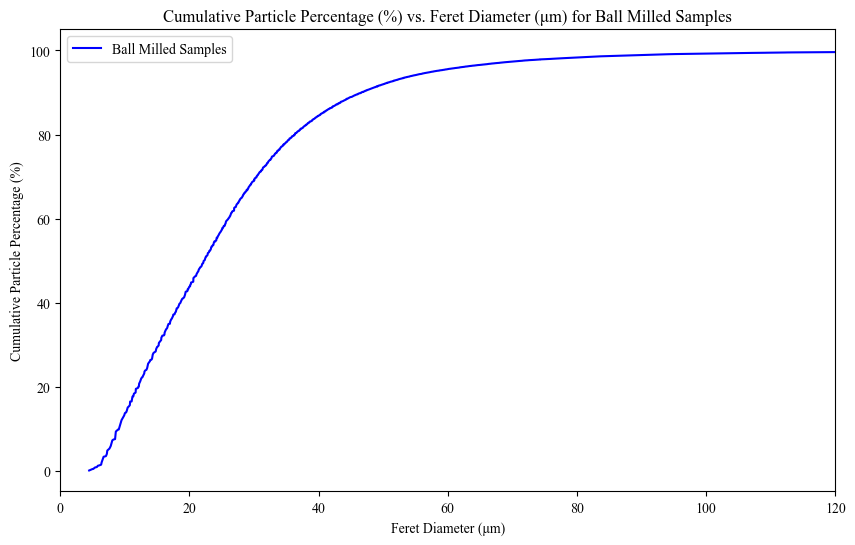

In [21]:
feret_counts = ball_milling_data['Feret'].value_counts().sort_index()
feret_counts = feret_counts.cumsum()
feret_percentage = (feret_counts / feret_counts.max()) * 100


# Plot
plt.figure(figsize=(10, 6))
plt.plot(feret_percentage.index, feret_percentage.values, linestyle='-', color='blue', label='Ball Milled Samples')
#plt.scatter(feret_percentage.index, feret_percentage.values, color='blue', label='Ball Milled Samples', s=5)

plt.legend()
plt.xlabel('Feret Diameter (μm)')
plt.ylabel('Cumulative Particle Percentage (%)')
plt.title('Cumulative Particle Percentage (%) vs. Feret Diameter (μm) for Ball Milled Samples')
plt.xlim(0,120)
plt.show()

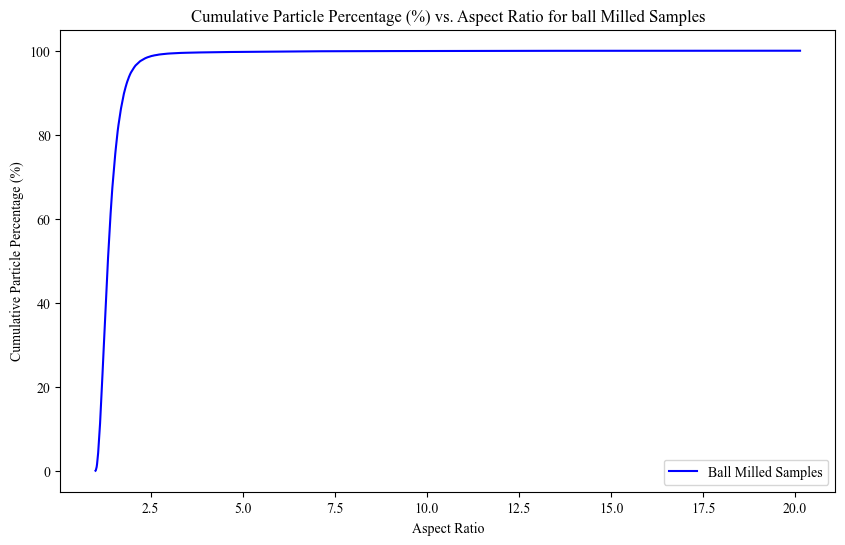

In [22]:
feret_counts = ball_milling_data['AR'].value_counts().sort_index()
feret_counts = feret_counts.cumsum()
feret_percentage = (feret_counts / feret_counts.max()) * 100


# Plot
plt.figure(figsize=(10, 6))
plt.plot(feret_percentage.index, feret_percentage.values, linestyle='-', color='blue', label='Ball Milled Samples')
#plt.scatter(feret_percentage.index, feret_percentage.values, color='blue', label='Ball Milled Samples', s=5)

plt.legend()
plt.xlabel('Aspect Ratio')
plt.ylabel('Cumulative Particle Percentage (%)')
plt.title('Cumulative Particle Percentage (%) vs. Aspect Ratio for ball Milled Samples')

plt.show()

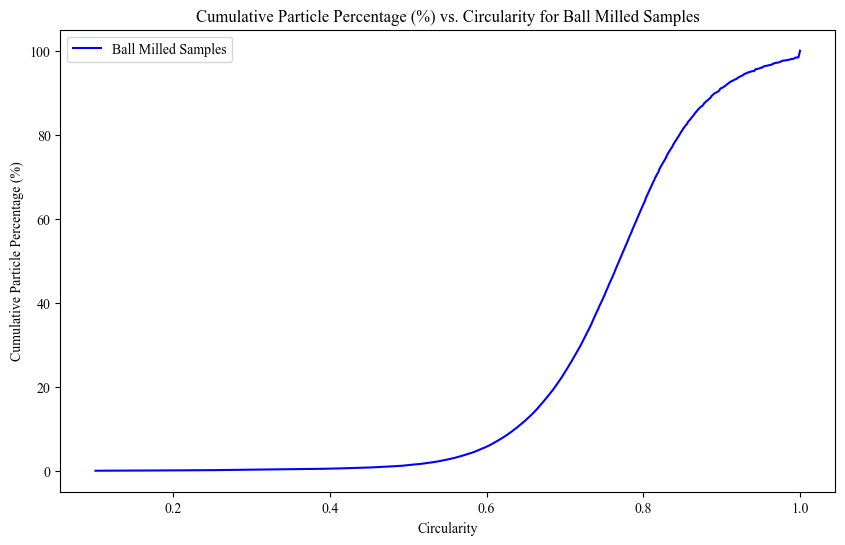

In [25]:
feret_counts = ball_milling_data['Circ.'].value_counts().sort_index()
feret_counts = feret_counts.cumsum()
feret_percentage = (feret_counts / feret_counts.max()) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(feret_percentage.index, feret_percentage.values, linestyle='-', color='blue', label='Ball Milled Samples')
#plt.scatter(feret_percentage.index, feret_percentage.values, color='blue', label='Ball Milled Samples', s=5)

plt.legend()
plt.xlabel('Circularity')
plt.ylabel('Cumulative Particle Percentage (%)')
plt.title('Cumulative Particle Percentage (%) vs. Circularity for Ball Milled Samples')

plt.show()